In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Функция ошибок

Возмем сгенерированные произвольные значения

In [2]:
predicted = [12.92469362, 8.42806167, 16.986717, 12.24674589, 16.31209368, 15.90590426, 13.20430213, 15.1873023, 16.05736461, 10.94078322, 10.54169929, 13.16121452, 14.30433731, 16.6769555, 8.42633753]
actual = [13.36076402, 7.84359027, 17.33225985, 12.53272279, 16.45922122, 15.78607249, 12.55150131, 15.12517038, 15.51272341, 10.39738185, 10.87650357, 12.92203527, 14.80391635, 17.0937987, 8.06756244]

## MSE
![MSE image](images/MSE.png "MSE")

In [3]:
# MSE
def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = sum((y_true[i] - y_pred[i])**2 for i in range(n)) / n
    return mse

In [4]:
mse = mean_squared_error(actual, predicted)
mse

0.16748260352583108

## MAE
![MAE image](images/MAE.png "MAE")

In [5]:
# MAE
def mean_absolute_error(y_true, y_pred):
    n = len(y_true)
    mae = sum(abs(y_true[i] - y_pred[i]) for i in range(n)) / n
    return mae

In [6]:
mae = mean_absolute_error(actual, predicted)
mae

0.3714118020000002

Посмотрим изменение чувствительности MSE против MAE

In [7]:
predicted_with_error = list(predicted)
predicted_with_error[0] = 100

In [8]:
mse_with_error = mean_squared_error(actual, predicted_with_error)
mse_with_error

500.5786195238172

In [9]:
mae_with_error = mean_absolute_error(actual, predicted_with_error)
mae_with_error

6.1182895073333325

In [10]:
print(f'With change of {predicted[0]} to {predicted_with_error[0]} in a single line mse changed from {mse} to {mse_with_error} '
      f'({round(mse_with_error/mse)} times) and mae changed from {mae} to {mae_with_error} ({round(mae_with_error/mae)} times)')

With change of 12.92469362 to 100 in a single line mse changed from 0.16748260352583108 to 500.5786195238172 (2989 times) and mae changed from 0.3714118020000002 to 6.1182895073333325 (16 times)


## Log-Cosh Loss

In [11]:
def log_cosh_loss(y_true, y_pred):
    n = len(y_true)
    log_cosh = sum(np.log(np.cosh(y_pred[i] - y_true[i])) for i in range(n)) / n
    return log_cosh

In [12]:
lcl = log_cosh_loss(actual, predicted)
lcl

0.08036861319491327

## F1-score
![F1-score image](images/F1.png "F1-score")

Let us generate two random arrays with 0s and 1s in size 30

In [13]:
predicted_bool = [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0]
actual_bool = [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0]

In [14]:
def f1_score(y_true, y_pred, invert = False):
    if invert:
        y_true = [not y for y in y_true]
        y_pred = [not y for y in y_pred]
    true_positives = sum(y_true[i] == 1 and y_pred[i] == 1 for i in range(len(y_true)))
    false_positives = sum(y_true[i] == 0 and y_pred[i] == 1 for i in range(len(y_true)))
    false_negatives = sum(y_true[i] == 1 and y_pred[i] == 0 for i in range(len(y_true)))

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

In [15]:
f1_score_true = f1_score(actual_bool, predicted_bool)
f1_score_true

0.9523809523809523

In [16]:
f1_score_false = f1_score(actual_bool, predicted_bool, invert=True)
f1_score_false

0.9743589743589743

# Линейная регрессия и подбор параметров через градиентный спуск

Возьмем произвольные значения

In [17]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([5,  6,  8, 11, 16, 13, 17, 20, 19, 26])

Посмотрим на графике

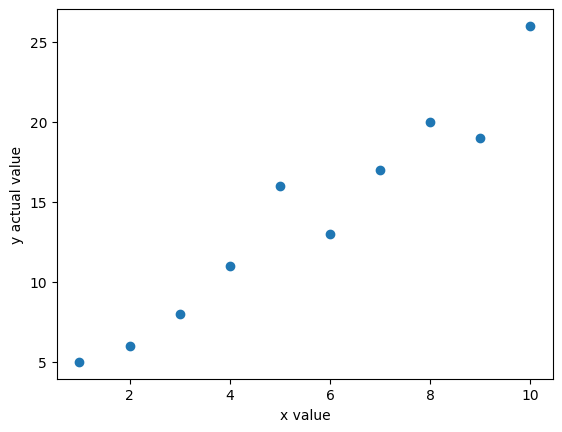

In [18]:
plt.scatter(X, y)
plt.xlabel('x value')
plt.ylabel('y actual value')
plt.show()

In [19]:
# линейная регрессия с обучением через градиентный спуск
def linear_regression(X, y, learning_rate=0.01, epochs=1000):
    n = len(X)
    w0 = 0
    w1 = 0

    for _ in range(epochs):
        y_pred = w0 + w1 * X
        dw0 = (-2 / n) * sum(y - y_pred)
        dw1 = (-2 / n) * sum(X * (y - y_pred))

        w0 -= learning_rate * dw0
        w1 -= learning_rate * dw1

    return w0, w1

Вычислим коэффициенты

In [20]:
w0, w1 = linear_regression(X, y)
print("w0 =", w0)
print("w1 =", w1)

w0 = 2.23814452191865
w1 = 2.1556120880981497


Предсказание

In [21]:
y_pred = w0 + w1 * X
y_pred

array([ 4.39375661,  6.5493687 ,  8.70498079, 10.86059287, 13.01620496,
       15.17181705, 17.32742914, 19.48304123, 21.63865331, 23.7942654 ])

Посмотрим на графике

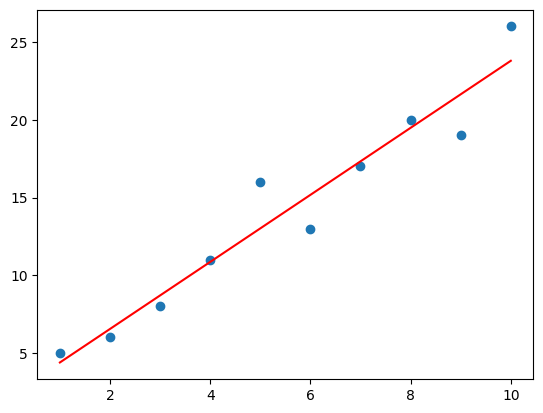

In [22]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

Посмотрим на ошибку от количества эпох


In [23]:
def build_error_chart(X, y, learning_rate=0.01, epochs=1000):
    n = len(X)
    w0 = 0
    w1 = 0

    error_array = []

    for _ in range(epochs):
        y_pred = w0 + w1 * X
        dw0 = (-2 / n) * sum(y - y_pred)
        dw1 = (-2 / n) * sum(X * (y - y_pred))

        w0 -= learning_rate * dw0
        w1 -= learning_rate * dw1
        error_array.append(mean_squared_error(y, y_pred))
        
    return error_array

In [60]:
errors = build_error_chart(X, y)[:10]
errors

[239.7,
 14.320121999999987,
 3.9731184915999975,
 3.4921858692144205,
 3.46397475394067,
 3.4565866604622415,
 3.4502050314867603,
 3.4439202267009934,
 3.4376900860072808,
 3.4315122541095655]

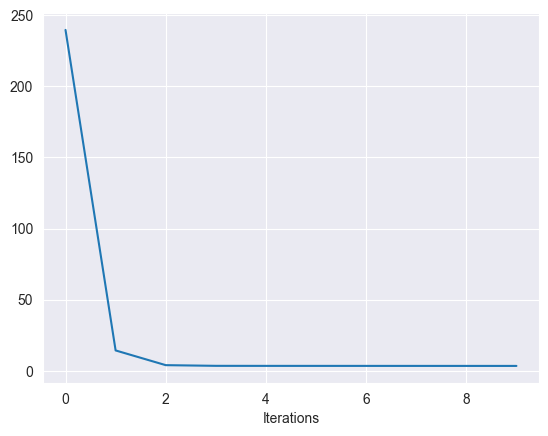

In [62]:
plt.plot(range(10), errors)
plt.xlabel('Iterations')
plt.show()

Как видно на графике, ошибка уменьшается с увеличением количества эпох. Даже небольшое число эпох позволяет значительно уменьшить ошибку